<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, poder clasificar los distintos vehículos basados en las características que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacío, rellene con el promedio asociado a esa columna. Finalmente, normalice los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2. Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3. Junte ambos dataset en uno, llamado **df_procesado**. 


#### 1.

In [3]:
#Se verán primero de que tipo son las columnas
df.dtypes

year                      int64
desplazamiento          float64
cilindros               float64
co2                     float64
clase_tipo               object
traccion_tipo            object
transmision_tipo         object
combustible_tipo         object
tamano_motor_tipo        object
consumo_tipo             object
co2_tipo                 object
consumo_litros_milla    float64
dtype: object

In [4]:
#Ahora se obtienen las columnas numericas
index = [i for i in range(0, len(df.dtypes)) if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64']
cols_nums = [df.columns[i] for i in index]

#Se crea el dataframe de valores numericos y se puede ver donde hay valores NaN
df_nums = df[cols_nums]
df_nums.notnull().all()

year                     True
desplazamiento          False
cilindros               False
co2                      True
consumo_litros_milla     True
dtype: bool

Vemos que se presentan valores __NaN__ en las columnas _desplazamiento_ y _cilindros_.

In [5]:
#Completando los valores vacíos en cada columna con el promedio de cada columna
for i in range(1,3):
    mean = df_nums[df_nums.columns[i]].mean()
    df_nums.loc[df_nums[df_nums.columns[i]].isnull(),df_nums.columns[i]] = mean

#Se verifica si quedan valores NaN
df_nums.notnull().all()

/home/pablo/anaconda3/envs/mat281/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


year                    True
desplazamiento          True
cilindros               True
co2                     True
consumo_litros_milla    True
dtype: bool

In [6]:
#Normalizando los datos con MinMaxScaler
norm = MinMaxScaler()
df_nums[cols_nums] = norm.fit_transform(df_nums[cols_nums])
df_nums

/home/pablo/anaconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pablo/anaconda3/envs/mat281/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.176532,0.090196


#### 2.

In [7]:
#Se obtienen las columnas categoricas
index = [i for i in range(0, len(df.dtypes)) if df.dtypes[i] != 'int64' and df.dtypes[i] != 'float64']
cols_cats = [df.columns[i] for i in index]

#Creando el dataframe con variables categoricas
df_cats = df[cols_cats]

# get_dummies
df_cats = pd.get_dummies(df_cats)
df_cats

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


Se tiene que cada columna es separada por cada valor que presenta tal columna, es decir, para cada valor que haya en alguna columna se crea una nueva columna de la forma ___columnaoriginal_valorencolumna___ eliminandose la columna original. Ejemplo, se tiene la columna  _clase_tipo_ y se elimina tal columna y se crean las columnas _clase_tipo_valor_ con valor en {camionetas, coche familiar, grandes, medianos, pequeños, deportivos, furgoneta, vehículos especiales}.

Finalmente, si tal fila presentaba el valor categorico en el dataframe original, se le asignará el valor __1__ en el nuevo dataframe en la columna con el nombre del valor y __0__ si es que no.

#### 3.

In [8]:
#Se concatenan los dataframes df_nums y df_cats
df_procesado = pd.concat([df_nums,df_cats],axis=1, sort=False)
df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

#### 1.

In [9]:
#Modelo kmeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### 2.

In [10]:
#Se calculan los centros
centroides = kmeans.cluster_centers_ 

#Se calculan los clusters
clusters = kmeans.labels_

#### 3.

In [11]:
# Se etiqueta con los clusters
df_procesado['cluster'] = clusters
df_procesado['cluster'] = df_procesado['cluster'].astype('category')
df_centroides = pd.DataFrame(centroides)
df_centroides['cluster'] = [1,2,3,4,5,6,7,8]

##### a)

In [12]:
#Se calcula el promedio
df_procesado.groupby('cluster').mean()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.478459,0.451028,0.327460,0.410095,0.343319,0.305117,0.017058,0.041365,0.048401,0.150533,...,0.958635,0.000000,0.040512,0.000853,0.000000,0.992324,0.000000,0.000640,0.007036,0.000000
1,0.426958,0.223823,0.173660,0.304619,0.226436,0.126535,0.097507,0.004838,0.088202,0.517306,...,0.000000,0.978415,0.000000,0.000000,0.021585,0.000000,0.992185,0.007815,0.000000,0.000000
2,0.694785,0.179180,0.150608,0.240036,0.156677,0.000000,0.110591,0.027843,0.181889,0.547749,...,0.000000,0.000000,0.000260,0.000000,0.999740,0.000000,0.013791,0.000520,0.000000,0.985688
3,0.412095,0.576135,0.420153,0.506906,0.449646,0.333801,0.003788,0.035639,0.038586,0.138628,...,0.040269,0.000000,0.009120,0.950610,0.000000,0.000982,0.000000,0.000140,0.998878,0.000000
4,0.588730,0.362290,0.299545,0.354136,0.282247,0.001505,0.083020,0.086531,0.189616,0.558816,...,0.000502,0.026085,0.973163,0.000000,0.000251,0.023577,0.000000,0.976423,0.000000,0.000000
5,0.407598,0.331441,0.256843,0.354290,0.282154,0.181278,0.084035,0.090639,0.133564,0.184580,...,0.000000,0.013868,0.980849,0.000165,0.005118,0.001156,0.000000,0.998844,0.000000,0.000000
6,0.577286,0.270707,0.210633,0.305304,0.226824,0.026190,0.093744,0.073166,0.192060,0.400125,...,0.000624,0.970900,0.000831,0.000000,0.027645,0.000000,0.968198,0.029724,0.000000,0.002079
7,0.438505,0.159462,0.141141,0.242197,0.156456,0.016439,0.124826,0.006408,0.093062,0.709668,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000836,0.001393,0.000000,0.997771


##### b)

In [13]:
#Se calcula la moda
df_procesado.groupby('cluster').agg(lambda x: x.value_counts().index[0])

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.029412,0.474359,0.285714,0.424351,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.179487,0.142857,0.317749,0.241830,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0.970588,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0.000000,0.564103,0.428571,0.454199,0.393464,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.617647,0.307692,0.285714,0.374603,0.281734,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
5,0.000000,0.307692,0.285714,0.374603,0.305011,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0.970588,0.179487,0.142857,0.317749,0.241830,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,0.029412,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.


In [14]:
#Regla del codo
num_clusters = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in num_clusters]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]

In [15]:
#Dataframe
df_codo = pd.DataFrame({'Number of Clusters':num_clusters,
                        'Score':score})
df_codo.head()

,Number of Clusters,Score
0,5,123928.309983
1,10,83376.771750
2,20,67755.891417
3,30,57318.373745
4,50,45615.613520


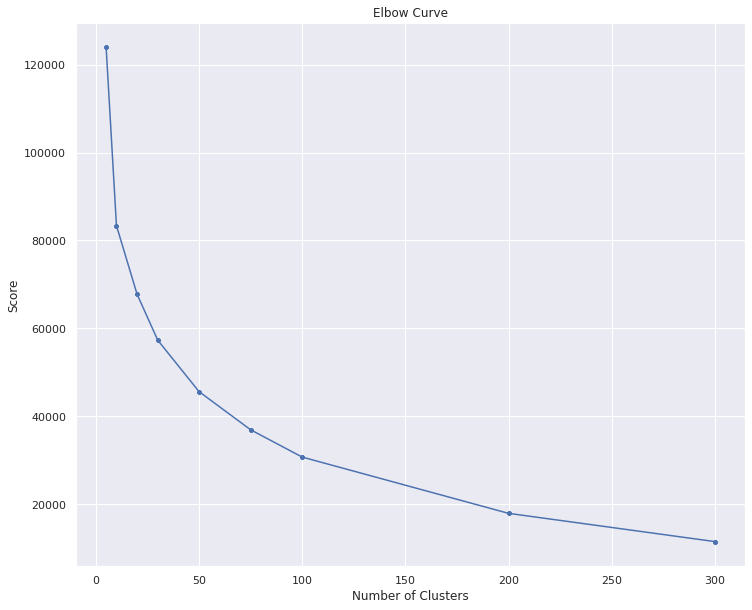

In [16]:
#Se grafican los datos con kmeans
fig, ax = plt.subplots(figsize=(12, 10))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_codo)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_codo)

#### Respuesta:

Claramente no se puede apreciar a simple vista si existe un punto de inflexión para así poder asegurar el número óptimo de clusters, dado la uniformidad que se ve. Con esto dicho, se podría realizar en una secuencia más grande, pero esto sería muy pesado computacionalmente.